In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [2]:
len(train_data), len(test_data)

(8982, 2246)

In [3]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
min(train_labels), max(train_labels)

(0, 45)

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
# We could also have used the inbuilt Keras method for this conversion.

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 265us/step - loss: 2.6407 - accuracy: 0.5054 - val_loss: 1.7544 - val_accuracy: 0.6230
Epoch 2/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.4407 - accuracy: 0.6974 - val_loss: 1.3345 - val_accuracy: 0.7090
Epoch 3/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.0769 - accuracy: 0.7666 - val_loss: 1.1564 - val_accuracy: 0.7490
Epoch 4/20
7982/7982 [==============================] - 0s 62us/step - loss: 0.8559 - accuracy: 0.8146 - val_loss: 1.0838 - val_accuracy: 0.7470
Epoch 5/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.6868 - accuracy: 0.8534 - val_loss: 0.9831 - val_accuracy: 0.7880
Epoch 6/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.5526 - accuracy: 0.8824 - val_loss: 0.9632 - val_accuracy: 0.7970
Epoch 7/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.45

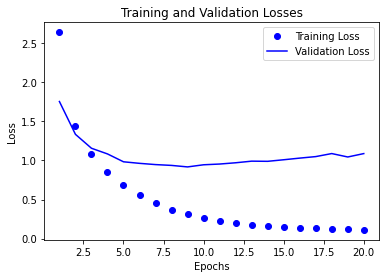

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

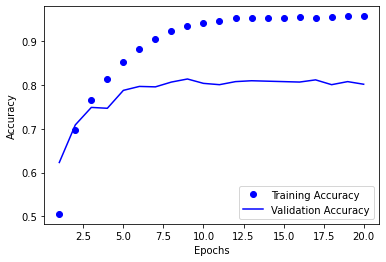

In [18]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
8982/8982 [==============================] - 1s 59us/step - loss: 2.5385 - accuracy: 0.5397
Epoch 2/9
8982/8982 [==============================] - 0s 54us/step - loss: 1.3603 - accuracy: 0.7204
Epoch 3/9
8982/8982 [==============================] - 0s 53us/step - loss: 0.9863 - accuracy: 0.7869
Epoch 4/9
8982/8982 [==============================] - 0s 55us/step - loss: 0.7627 - accuracy: 0.8385
Epoch 5/9
8982/8982 [==============================] - 0s 55us/step - loss: 0.6009 - accuracy: 0.8732
Epoch 6/9
8982/8982 [==============================] - 0s 55us/step - loss: 0.4792 - accuracy: 0.9011
Epoch 7/9
8982/8982 [==============================] - 0s 53us/step - loss: 0.3884 - accuracy: 0.9183
Epoch 8/9
8982/8982 [==============================] - 0s 54us/step - loss: 0.3173 - accuracy: 0.9326
Epoch 9/9
2246/2246 [==============================] - 0s 93us/step


In [21]:
results

[0.9414428418381131, 0.796972393989563]

In [22]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1736420302760463

In [0]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

0.99999994

In [26]:
np.argmax(predictions[0])

3

In [0]:
# Labels could have been handled this way too:
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)
# Use loss function as 'sparse_categorical_crossentropy' instead.